<a href="https://colab.research.google.com/github/Amaliaaap/Project/blob/main/Facebook%20Live%20Seller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FACEBOOK LIVE SELLERS**

by: Dian Amalia Putri

Dataset ini menyoroti fenomena penjualan langsung yang terus berkembang, terutama di kawasan Asia. Seiring dengan terus meningkatnya digitalisasi dan penggunaan media sosial, platform seperti Facebook memainkan peran penting dalam membantu pedagang kecil memperluas jangkauan dan berinteraksi dengan audiens yang lebih luas. Hal ini telah menyebabkan meluasnya adopsi praktik penjualan langsung di kalangan bisnis.

Analisis ini bertujuan untuk mendalami berbagai aspek Facebook Live Selling  menggunakan model clustering.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# 1. Load Dataset

In [84]:
df = pd.read_csv('/content/drive/MyDrive/ML/Live.csv')

In [85]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# 2. Exploring dat

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [87]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [88]:
df.shape

(7050, 16)

In [89]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

**Cek Missing value**

In [90]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


Pada dataset terdapat 4 kolom yang redundan, jadi  harus dibuang sebelum proses selanjutnya

In [91]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [92]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [93]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**Explore variabel *status_id*.**

In [94]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [95]:
len(df['status_id'].unique())

6997

terlihat bahwa ada 6997 label unik dalam variabel status_id. Jumlah total kejadian dalam kumpulan data adalah 7050. Jadi ini bukan variabel yang dapat kita gunakan. Oleh karena itu, variabel ini akan diabaikan.

**Explore variabel *status_published*.**

In [96]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [97]:
len(df['status_published'].unique())

6913

Terlihat ada 6913 label unik dalam variabel *status_published*. Variabel ini akan dihilangkan.

**Explore variabel *status_type*.**

In [98]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [99]:
len(df['status_type'].unique())

4

Ada 4 kategori label dalam variabel *status_type*.

**Drop variabel**

In [100]:
df.drop(columns=['status_id', 'status_published'], inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [102]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**Encoding**

In [103]:
X = df
y = df['status_type']

In [104]:
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [105]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


**Scaling fitur**

In [106]:
cols = df.columns
ms = MinMaxScaler()
X = ms.fit_transform(df)
X = pd.DataFrame(X, columns=cols)

In [107]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# 3. Process

**Elbow Method**

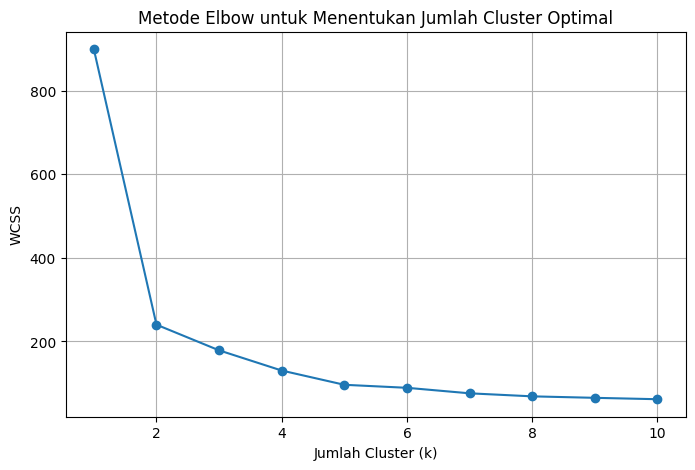

In [109]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Berdasarkan gravik Elbow Method, terlihat bahwa penurunan WCSS mulai melandai setelah k=2. ini menunjukkan bahwa 2 adalah jumlah cluster optimal untuk dataset ini karena setelah itu penurunan WCSS tidak signifikan lagi.

untuk menguatkan hasil ini, akan dibandingkan dengan nilai silhoutte score.

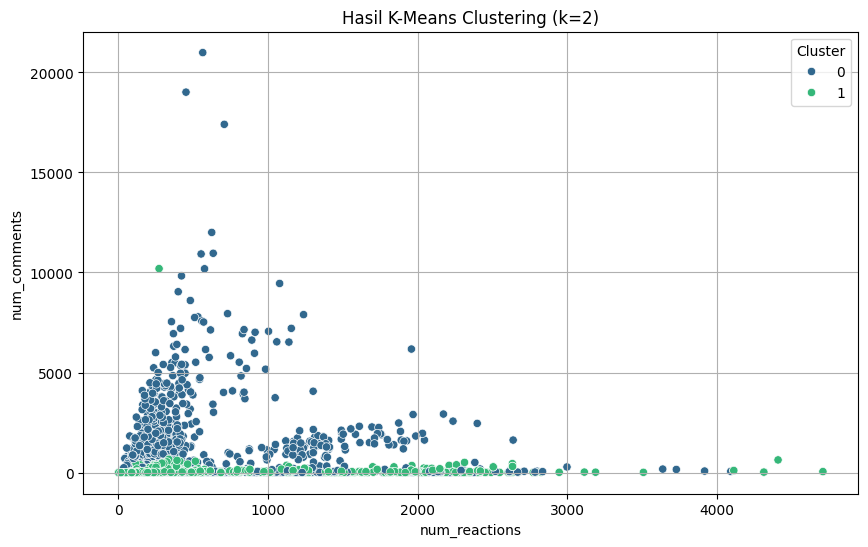

In [112]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
df['KMeans_Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_reactions', y='num_comments', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title(f'Hasil K-Means Clustering (k={n_clusters})')
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**PCA**

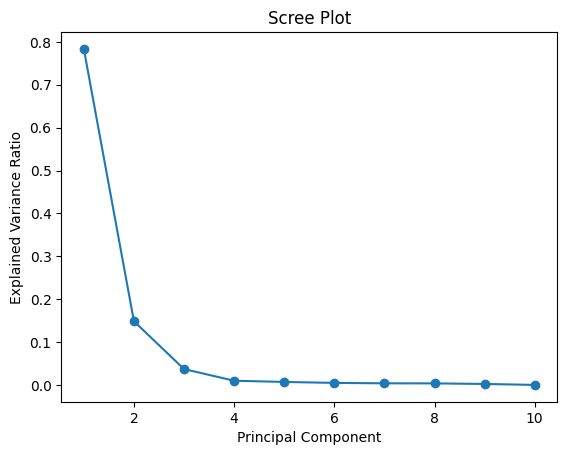

In [111]:
pca = PCA()
pca_result = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

Berdasarkan grafik di atas, penurunan tajam pada titik di mana jumlah dimensi berkurang menjadi 2. Sehingga dimensi 2 akan dipilih.

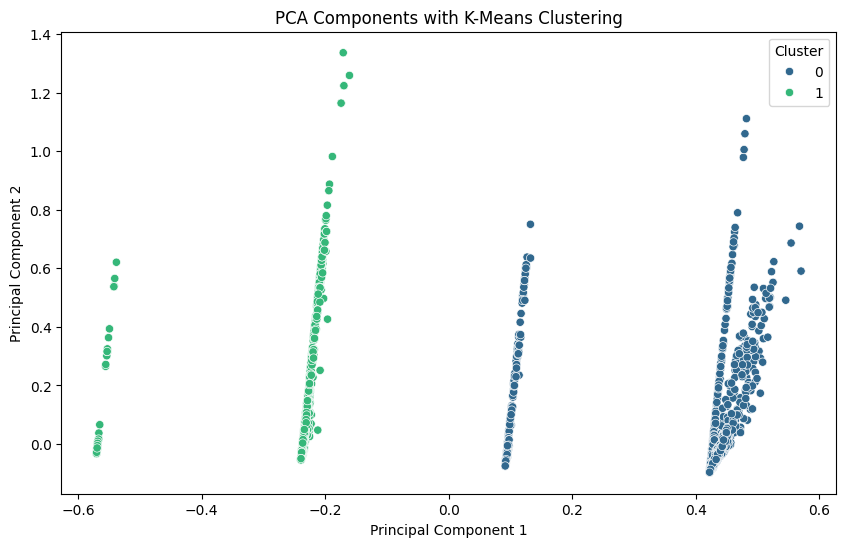

In [113]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_2.fit_predict(pca_df)
pca_df['Cluster'] = cluster_labels

# Scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [115]:
kmeans_2.inertia_

labels = kmeans_2.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


In [116]:
print("Nilai Inertia:", kmeans.inertia_)

Nilai Inertia: 237.7572640441955


1. Skor akurasi sebesar 0,61 menunjukkan ketepatan keseluruhan model pengelompokan. Hal ini menunjukkan bahwa sekitar 61% titik data ditetapkan dengan benar ke dalam kelompoknya masing-masing berdasarkan algoritma pengelompokan yang digunakan.

2. Nilai inersia sebesar 237,76 menunjukkan jumlah kuadrat dalam klaster (WCSS) untuk model pengelompokan K-means dengan 2 klaster. Nilai ini memberikan wawasan tentang kekompakan klaster. Inersia yang lebih rendah menunjukkan klaster yang lebih rapat, yang menyiratkan pemisahan dan pengelompokan titik data yang lebih baik dalam setiap klaster.

Metrik ini menunjukkan bahwa meskipun model pengelompokan mencapai tingkat akurasi sedang, masih ada ruang untuk meningkatkan kekompakan klaster. Untuk mencapainya, diperlukan data tambahan dan pengoptimalan model lebih lanjut.

In [117]:
df['KMeans_Cluster'] = labels
print("\nUkuran setiap cluster:")
print(df['KMeans_Cluster'].value_counts().sort_index())


Ukuran setiap cluster:
KMeans_Cluster
0    2699
1    4351
Name: count, dtype: int64


In [119]:
print("\nRata-rata fitur per cluster (data asli):")
print(df.groupby('KMeans_Cluster')[['status_type',	'num_reactions',	'num_comments',	'num_shares',	'num_likes',	'num_loves',	'num_wows',	'num_hahas',	'num_sads',	'num_angrys']].mean())


Rata-rata fitur per cluster (data asli):
                status_type  num_reactions  num_comments  num_shares  \
KMeans_Cluster                                                         
0                  2.864765     304.421638    560.493146  100.381993   
1                  0.985521     184.024822     15.844404    2.580556   

                 num_likes  num_loves  num_wows  num_hahas  num_sads  \
KMeans_Cluster                                                         
0               269.050019  30.945165  2.275658   1.515376  0.410152   
1               181.541715   1.428637  0.677545   0.188462  0.140427   

                num_angrys  
KMeans_Cluster              
0                 0.223046  
1                 0.045047  
